In [ ]:
import math
from numpy.lib.function_base import _i0_1
import pandas_datareader as web
import numpy as np
import pandas as pd
import config as cfg
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import datetime
inputSize = 60

In [64]:
pip install pandas-datareader
pip install config
pip install keras
pip install tensorflow

SyntaxError: invalid syntax (<ipython-input-64-417e5d6bfcf1>, line 1)

In [77]:
df = web.DataReader('BITFINEX/BTCUSD', data_source='quandl',start= '2019-01-01',api_key= 'N3rxEmQhdYSeE96aP37z')

# Só nos interessa pegar o preço de fechamento ou Preço final

In [78]:
data = df.filter(['Last'])
data = data.sort_values(by=['Date'])
dataset = data.values
trainingDataLen = math.ceil( len(dataset)*0.6 )
scaler = MinMaxScaler(feature_range= (0,1)) #Escalar todos os valores entre 0 and 1
scaledData = scaler.fit_transform(dataset)
trainData = scaledData[0:trainingDataLen, :]

In [79]:
#Dividí-lo em X = série de pontos em que cada ponto é um array com 60 preços anteriores; Y = série de pontos em que cada ponto é o preço atual
xTrain = [] #indp
yTrain = [] #depd
for i in range(inputSize, len(trainData)):
    xTrain.append(trainData[i-inputSize:i,0])
    yTrain.append(trainData[i,0])

xTrain, yTrain = np.array(xTrain), np.array(yTrain)
xTrain = np.reshape(xTrain, (xTrain.shape[0], xTrain.shape[1],1))

# Construindo o modelo de previsão LSTM:

In [80]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (xTrain.shape[1],1)))
#50 neurons, return_sequences=True signifca que há uma próxima camada LSTM, e o formato da entrada é de 60 preços e 1 saída (preço atual)
model.add(LSTM(50,return_sequences=False))
#50 neurons novamente, agora falso porque não há uma próxima LSTM
model.add(Dense(25)) #25 neurons, camada regular
model.add(Dense(1)) #1 neuron de saída com o preço
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xTrain, yTrain, batch_size=1, epochs=3)

Epoch 1/3
656/656 [==============================] - 37s 46ms/step - loss: 4.2935e-04
Epoch 2/3
656/656 [==============================] - 31s 47ms/step - loss: 2.7285e-04
Epoch 3/3
656/656 [==============================] - 35s 53ms/step - loss: 2.1286e-04


In [81]:
testData = scaledData[trainingDataLen-inputSize: , :]
testDataIncludeFut = testData
xTest = []
xFutures = []
yTest = dataset[trainingDataLen: , :]
for i in range(inputSize, len(testData)):
    xTest.append(testData[i-inputSize:i, 0])

xTest = np.array(xTest)
xTest = np.reshape(xTest, (xTest.shape[0],xTest.shape[1],1))

# Capturando os dados ou valores previstos

In [82]:
validvals = model.predict(xTest)
validvals = scaler.inverse_transform(validvals)
#Erro quadrático médio
rmse=np.sqrt(np.mean(((validvals- yTest)**2)))
print('rmse=',rmse)

rmse= 2819.2275914750794


# Valores futuros:

In [83]:
FUTURE_SPAN  = 30 #número de dias que o código vai tentar prever o preço:
import copy
testDataCopy = copy.deepcopy(testData)
testDataIncludeFut = copy.deepcopy(testData)
xFutures = []
for i in range(FUTURE_SPAN):
    xFutures.append(testDataIncludeFut[-1-inputSize:-1, 0])
    xFuturesTransf = copy.deepcopy(np.array(xFutures))
    xFuturesTransf = np.reshape(xFuturesTransf, (xFuturesTransf.shape[0],xFuturesTransf.shape[1],1))
    yFutures = model.predict(xFuturesTransf)
    testDataIncludeFut = np.append(testDataCopy, yFutures, axis=0)
predvals = scaler.inverse_transform(yFutures)

# Visualizar os dados:

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ConversionError: Failed to convert value(s) to axis units: array([Timestamp('2021-01-04 00:00:00'), Timestamp('2021-01-05 00:00:00'),
       Timestamp('2021-01-06 00:00:00'), Timestamp('2021-01-07 00:00:00'),
       Timestamp('2021-01-08 00:00:00'), Timestamp('2021-01-09 00:00:00'),
       Timestamp('2021-01-10 00:00:00'), Timestamp('2021-01-11 00:00:00'),
       Timestamp('2021-01-12 00:00:00'), Timestamp('2021-01-13 00:00:00'),
       Timestamp('2021-01-14 00:00:00'), Timestamp('2021-01-15 00:00:00'),
       Timestamp('2021-01-16 00:00:00'), Timestamp('2021-01-17 00:00:00'),
       Timestamp('2021-01-18 00:00:00'), Timestamp('2021-01-19 00:00:00'),
       Timestamp('2021-01-20 00:00:00'), Timestamp('2021-01-21 00:00:00'),
       Timestamp('2021-01-22 00:00:00'), Timestamp('2021-01-23 00:00:00'),
       Timestamp('2021-01-24 00:00:00'), Timestamp('2021-01-25 00:00:00'),
       Timestamp('2021-01-26 00:00:00'), Timestamp('2021-01-27 00:00:00'),
       Timestamp('2021-01-28 00:00:00'), Timestamp('2021-01-29 00:00:00'),
       Timestamp('2021-01-30 00:00:00'), Timestamp('2021-01-31 00:00:00'),
       Timestamp('2021-02-01 00:00:00'), Timestamp('2021-02-02 00:00:00'),
       Timestamp('2021-02-03 00:00:00'), Timestamp('2021-02-04 00:00:00'),
       Timestamp('2021-02-05 00:00:00'), Timestamp('2021-02-06 00:00:00'),
       Timestamp('2021-02-07 00:00:00'), Timestamp('2021-02-08 00:00:00'),
       Timestamp('2021-02-09 00:00:00'), Timestamp('2021-02-10 00:00:00'),
       Timestamp('2021-02-11 00:00:00'), Timestamp('2021-02-12 00:00:00'),
       Timestamp('2021-02-13 00:00:00'), Timestamp('2021-02-14 00:00:00'),
       Timestamp('2021-02-15 00:00:00'), Timestamp('2021-02-16 00:00:00'),
       Timestamp('2021-02-17 00:00:00'), Timestamp('2021-02-18 00:00:00'),
       Timestamp('2021-02-19 00:00:00'), Timestamp('2021-02-20 00:00:00'),
       Timestamp('2021-02-21 00:00:00'), Timestamp('2021-02-22 00:00:00'),
       Timestamp('2021-02-23 00:00:00'), Timestamp('2021-02-24 00:00:00'),
       Timestamp('2021-02-25 00:00:00'), Timestamp('2021-02-26 00:00:00'),
       Timestamp('2021-02-27 00:00:00'), Timestamp('2021-02-28 00:00:00'),
       Timestamp('2021-03-01 00:00:00'), Timestamp('2021-03-02 00:00:00'),
       Timestamp('2021-03-03 00:00:00'), Timestamp('2021-03-04 00:00:00'),
       Timestamp('2021-03-05 00:00:00'), Timestamp('2021-03-06 00:00:00'),
       Timestamp('2021-03-08 00:00:00'), Timestamp('2021-03-09 00:00:00'),
       Timestamp('2021-03-10 00:00:00'), Timestamp('2021-03-11 00:00:00'),
       Timestamp('2021-03-12 00:00:00'), Timestamp('2021-03-13 00:00:00'),
       Timestamp('2021-03-14 00:00:00'), Timestamp('2021-03-15 00:00:00'),
       Timestamp('2021-03-16 00:00:00'), Timestamp('2021-03-17 00:00:00'),
       Timestamp('2021-03-18 00:00:00'), Timestamp('2021-03-19 00:00:00'),
       Timestamp('2021-03-20 00:00:00'), Timestamp('2021-03-21 00:00:00'),
       Timestamp('2021-03-22 00:00:00'), Timestamp('2021-03-23 00:00:00'),
       Timestamp('2021-03-24 00:00:00'), Timestamp('2021-03-25 00:00:00'),
       Timestamp('2021-03-26 00:00:00'), Timestamp('2021-03-27 00:00:00'),
       Timestamp('2021-03-28 00:00:00'), Timestamp('2021-03-29 00:00:00'),
       Timestamp('2021-03-30 00:00:00'), Timestamp('2021-03-31 00:00:00'),
       Timestamp('2021-04-01 00:00:00'), Timestamp('2021-04-02 00:00:00'),
       Timestamp('2021-04-03 00:00:00'), Timestamp('2021-04-04 00:00:00'),
       Timestamp('2021-04-05 00:00:00'), Timestamp('2021-04-06 00:00:00'),
       Timestamp('2021-04-07 00:00:00'), Timestamp('2021-04-08 00:00:00'),
       Timestamp('2021-04-09 00:00:00'), Timestamp('2021-04-10 00:00:00'),
       Timestamp('2021-04-11 00:00:00'), Timestamp('2021-04-12 00:00:00'),
       Timestamp('2021-04-13 00:00:00'), Timestamp('2021-04-14 00:00:00'),
       Timestamp('2021-04-15 00:00:00'), Timestamp('2021-04-16 00:00:00'),
       Timestamp('2021-04-17 00:00:00'), Timestamp('2021-04-18 00:00:00'),
       Timestamp('2021-04-19 00:00:00'), Timestamp('2021-04-20 00:00:00'),
       Timestamp('2021-04-21 00:00:00'), Timestamp('2021-04-22 00:00:00'),
       Timestamp('2021-04-23 00:00:00'), Timestamp('2021-04-24 00:00:00'),
       Timestamp('2021-04-25 00:00:00'), Timestamp('2021-04-26 00:00:00'),
       Timestamp('2021-04-27 00:00:00'), Timestamp('2021-04-28 00:00:00'),
       Timestamp('2021-04-29 00:00:00'), Timestamp('2021-04-30 00:00:00'),
       Timestamp('2021-05-01 00:00:00'), Timestamp('2021-05-02 00:00:00'),
       Timestamp('2021-05-03 00:00:00'), Timestamp('2021-05-04 00:00:00'),
       Timestamp('2021-05-05 00:00:00'), Timestamp('2021-05-06 00:00:00'),
       Timestamp('2021-05-07 00:00:00'), Timestamp('2021-05-08 00:00:00'),
       Timestamp('2021-05-09 00:00:00'), Timestamp('2021-05-10 00:00:00'),
       Timestamp('2021-05-11 00:00:00'), Timestamp('2021-05-12 00:00:00'),
       Timestamp('2021-05-13 00:00:00'), Timestamp('2021-05-14 00:00:00'),
       Timestamp('2021-05-15 00:00:00'), Timestamp('2021-05-16 00:00:00'),
       Timestamp('2021-05-17 00:00:00'), Timestamp('2021-05-18 00:00:00'),
       Timestamp('2021-05-19 00:00:00'), Timestamp('2021-05-20 00:00:00'),
       Timestamp('2021-05-21 00:00:00'), Timestamp('2021-05-22 00:00:00'),
       Timestamp('2021-05-23 00:00:00'), Timestamp('2021-05-24 00:00:00'),
       Timestamp('2021-05-25 00:00:00'), Timestamp('2021-05-26 00:00:00'),
       Timestamp('2021-05-27 00:00:00'), Timestamp('2021-05-28 00:00:00'),
       Timestamp('2021-05-29 00:00:00'), Timestamp('2021-05-30 00:00:00'),
       Timestamp('2021-05-31 00:00:00'), Timestamp('2021-06-01 00:00:00'),
       Timestamp('2021-06-02 00:00:00'), Timestamp('2021-06-03 00:00:00'),
       Timestamp('2021-06-04 00:00:00'), Timestamp('2021-06-05 00:00:00'),
       Timestamp('2021-06-06 00:00:00'), Timestamp('2021-06-07 00:00:00'),
       Timestamp('2021-06-08 00:00:00'), Timestamp('2021-06-09 00:00:00'),
       Timestamp('2021-06-10 00:00:00'), Timestamp('2021-06-11 00:00:00'),
       Timestamp('2021-06-12 00:00:00'), Timestamp('2021-06-13 00:00:00'),
       Timestamp('2021-06-14 00:00:00'), Timestamp('2021-06-15 00:00:00'),
       Timestamp('2021-06-16 00:00:00'), Timestamp('2021-06-17 00:00:00'),
       Timestamp('2021-06-18 00:00:00'), Timestamp('2021-06-19 00:00:00'),
       Timestamp('2021-06-20 00:00:00'), Timestamp('2021-06-21 00:00:00'),
       Timestamp('2021-06-22 00:00:00'), Timestamp('2021-06-23 00:00:00'),
       Timestamp('2021-06-24 00:00:00'), Timestamp('2021-06-25 00:00:00'),
       Timestamp('2021-06-26 00:00:00'), Timestamp('2021-06-27 00:00:00'),
       Timestamp('2021-06-28 00:00:00'), Timestamp('2021-06-29 00:00:00'),
       Timestamp('2021-06-30 00:00:00'), Timestamp('2021-07-01 00:00:00'),
       Timestamp('2021-07-02 00:00:00'), Timestamp('2021-07-03 00:00:00'),
       Timestamp('2021-07-04 00:00:00'), Timestamp('2021-07-05 00:00:00'),
       Timestamp('2021-07-06 00:00:00'), Timestamp('2021-07-07 00:00:00'),
       Timestamp('2021-07-08 00:00:00'), Timestamp('2021-07-09 00:00:00'),
       Timestamp('2021-07-10 00:00:00'), Timestamp('2021-07-11 00:00:00'),
       Timestamp('2021-07-12 00:00:00'), Timestamp('2021-07-13 00:00:00'),
       Timestamp('2021-07-14 00:00:00'), Timestamp('2021-07-15 00:00:00'),
       Timestamp('2021-07-16 00:00:00'), Timestamp('2021-07-17 00:00:00'),
       Timestamp('2021-07-18 00:00:00'), Timestamp('2021-07-19 00:00:00'),
       Timestamp('2021-07-20 00:00:00'), Timestamp('2021-07-21 00:00:00'),
       Timestamp('2021-07-22 00:00:00'), Timestamp('2021-07-23 00:00:00'),
       Timestamp('2021-07-24 00:00:00'), Timestamp('2021-07-25 00:00:00'),
       Timestamp('2021-07-26 00:00:00'), Timestamp('2021-07-27 00:00:00'),
       Timestamp('2021-07-28 00:00:00'), Timestamp('2021-07-29 00:00:00'),
       Timestamp('2021-07-30 00:00:00'), Timestamp('2021-07-31 00:00:00'),
       Timestamp('2021-08-01 00:00:00'), Timestamp('2021-08-02 00:00:00'),
       Timestamp('2021-08-03 00:00:00'), Timestamp('2021-08-04 00:00:00'),
       Timestamp('2021-08-05 00:00:00'), Timestamp('2021-08-06 00:00:00'),
       Timestamp('2021-08-07 00:00:00'), Timestamp('2021-08-08 00:00:00'),
       Timestamp('2021-08-09 00:00:00'), Timestamp('2021-08-10 00:00:00'),
       Timestamp('2021-08-11 00:00:00'), Timestamp('2021-08-12 00:00:00'),
       Timestamp('2021-08-13 00:00:00'), Timestamp('2021-08-14 00:00:00'),
       Timestamp('2021-08-15 00:00:00'), Timestamp('2021-08-16 00:00:00'),
       Timestamp('2021-08-17 00:00:00'), Timestamp('2021-08-18 00:00:00'),
       Timestamp('2021-08-19 00:00:00'), Timestamp('2021-08-20 00:00:00'),
       Timestamp('2021-08-21 00:00:00'), Timestamp('2021-08-22 00:00:00'),
       Timestamp('2021-08-23 00:00:00'), Timestamp('2021-08-24 00:00:00'),
       Timestamp('2021-08-25 00:00:00'), Timestamp('2021-08-26 00:00:00'),
       Timestamp('2021-08-27 00:00:00'), Timestamp('2021-08-28 00:00:00'),
       Timestamp('2021-08-29 00:00:00'), Timestamp('2021-08-30 00:00:00'),
       Timestamp('2021-08-31 00:00:00'), Timestamp('2021-09-01 00:00:00'),
       Timestamp('2021-09-02 00:00:00'), Timestamp('2021-09-03 00:00:00'),
       Timestamp('2021-09-04 00:00:00'), Timestamp('2021-09-05 00:00:00'),
       Timestamp('2021-09-06 00:00:00'), Timestamp('2021-09-07 00:00:00'),
       Timestamp('2021-09-08 00:00:00'), Timestamp('2021-09-09 00:00:00'),
       Timestamp('2021-09-10 00:00:00'), Timestamp('2021-09-11 00:00:00'),
       Timestamp('2021-09-12 00:00:00'), Timestamp('2021-09-13 00:00:00'),
       Timestamp('2021-09-14 00:00:00'), Timestamp('2021-09-15 00:00:00'),
       Timestamp('2021-09-16 00:00:00'), Timestamp('2021-09-17 00:00:00'),
       Timestamp('2021-09-18 00:00:00'), Timestamp('2021-09-19 00:00:00'),
       Timestamp('2021-09-20 00:00:00'), Timestamp('2021-09-21 00:00:00'),
       Timestamp('2021-09-22 00:00:00'), Timestamp('2021-09-23 00:00:00'),
       Timestamp('2021-09-24 00:00:00'), Timestamp('2021-09-25 00:00:00'),
       Timestamp('2021-09-26 00:00:00'), Timestamp('2021-09-27 00:00:00'),
       Timestamp('2021-09-28 00:00:00'), Timestamp('2021-09-29 00:00:00'),
       Timestamp('2021-09-30 00:00:00'), Timestamp('2021-10-01 00:00:00'),
       Timestamp('2021-10-02 00:00:00'), Timestamp('2021-10-03 00:00:00'),
       Timestamp('2021-10-04 00:00:00'), Timestamp('2021-10-05 00:00:00'),
       Timestamp('2021-10-06 00:00:00'), Timestamp('2021-10-07 00:00:00'),
       Timestamp('2021-10-08 00:00:00'), Timestamp('2021-10-09 00:00:00'),
       Timestamp('2021-10-10 00:00:00'), Timestamp('2021-10-11 00:00:00'),
       Timestamp('2021-10-12 00:00:00'), Timestamp('2021-10-13 00:00:00'),
       Timestamp('2021-10-14 00:00:00'), Timestamp('2021-10-15 00:00:00'),
       Timestamp('2021-10-16 00:00:00'), Timestamp('2021-10-17 00:00:00'),
       Timestamp('2021-10-18 00:00:00'), Timestamp('2021-10-19 00:00:00'),
       Timestamp('2021-10-20 00:00:00'), Timestamp('2021-10-21 00:00:00'),
       Timestamp('2021-10-22 00:00:00'), Timestamp('2021-10-23 00:00:00'),
       Timestamp('2021-10-24 00:00:00'), Timestamp('2021-10-25 00:00:00'),
       Timestamp('2021-10-26 00:00:00'), Timestamp('2021-10-27 00:00:00'),
       Timestamp('2021-10-28 00:00:00'), Timestamp('2021-10-29 00:00:00'),
       Timestamp('2021-10-30 00:00:00'), Timestamp('2021-10-31 00:00:00'),
       Timestamp('2021-11-01 00:00:00'), Timestamp('2021-11-02 00:00:00'),
       Timestamp('2021-11-03 00:00:00'), Timestamp('2021-11-04 00:00:00'),
       Timestamp('2021-11-05 00:00:00'), Timestamp('2021-11-06 00:00:00'),
       Timestamp('2021-11-07 00:00:00'), Timestamp('2021-11-08 00:00:00'),
       Timestamp('2021-11-09 00:00:00'), Timestamp('2021-11-10 00:00:00'),
       Timestamp('2021-11-11 00:00:00'), Timestamp('2021-11-12 00:00:00'),
       Timestamp('2021-11-13 00:00:00'), Timestamp('2021-11-14 00:00:00'),
       Timestamp('2021-11-15 00:00:00'), Timestamp('2021-11-16 00:00:00'),
       Timestamp('2021-11-17 00:00:00'), Timestamp('2021-11-18 00:00:00'),
       Timestamp('2021-11-19 00:00:00'), Timestamp('2021-11-20 00:00:00'),
       Timestamp('2021-11-21 00:00:00'), Timestamp('2021-11-22 00:00:00'),
       Timestamp('2021-11-23 00:00:00'), Timestamp('2021-11-24 00:00:00'),
       Timestamp('2021-11-25 00:00:00'), Timestamp('2021-11-26 00:00:00'),
       Timestamp('2021-11-27 00:00:00'), Timestamp('2021-11-28 00:00:00'),
       Timestamp('2021-11-29 00:00:00'), Timestamp('2021-11-30 00:00:00'),
       Timestamp('2021-12-01 00:00:00'), Timestamp('2021-12-02 00:00:00'),
       Timestamp('2021-12-03 00:00:00'), Timestamp('2021-12-04 00:00:00'),
       Timestamp('2021-12-05 00:00:00'), Timestamp('2021-12-06 00:00:00'),
       Timestamp('2021-12-07 00:00:00'), Timestamp('2021-12-08 00:00:00'),
       Timestamp('2021-12-09 00:00:00'), Timestamp('2021-12-10 00:00:00'),
       Timestamp('2021-12-11 00:00:00'), Timestamp('2021-12-12 00:00:00'),
       Timestamp('2021-12-13 00:00:00'), Timestamp('2021-12-14 00:00:00'),
       Timestamp('2021-12-15 00:00:00'), Timestamp('2021-12-16 00:00:00'),
       Timestamp('2021-12-17 00:00:00'), Timestamp('2021-12-18 00:00:00'),
       Timestamp('2021-12-19 00:00:00'), Timestamp('2021-12-20 00:00:00'),
       Timestamp('2021-12-21 00:00:00'), Timestamp('2021-12-22 00:00:00'),
       Timestamp('2021-12-23 00:00:00'), Timestamp('2021-12-24 00:00:00'),
       Timestamp('2021-12-25 00:00:00'), Timestamp('2021-12-26 00:00:00'),
       Timestamp('2021-12-27 00:00:00'), Timestamp('2021-12-28 00:00:00'),
       Timestamp('2021-12-29 00:00:00'), Timestamp('2021-12-30 00:00:00'),
       Timestamp('2021-12-31 00:00:00'), Timestamp('2022-01-01 00:00:00'),
       Timestamp('2022-01-02 00:00:00'), Timestamp('2022-01-03 00:00:00'),
       Timestamp('2022-01-04 00:00:00'), Timestamp('2022-01-05 00:00:00'),
       Timestamp('2022-01-06 00:00:00'), Timestamp('2022-01-07 00:00:00'),
       Timestamp('2022-01-08 00:00:00'), Timestamp('2022-01-09 00:00:00'),
       Timestamp('2022-01-10 00:00:00'), Timestamp('2022-01-11 00:00:00'),
       Timestamp('2022-01-12 00:00:00'), Timestamp('2022-01-13 00:00:00'),
       Timestamp('2022-01-14 00:00:00'), Timestamp('2022-01-15 00:00:00'),
       Timestamp('2022-01-16 00:00:00'), Timestamp('2022-01-17 00:00:00'),
       Timestamp('2022-01-18 00:00:00'), Timestamp('2022-01-19 00:00:00'),
       Timestamp('2022-01-20 00:00:00'), Timestamp('2022-01-21 00:00:00'),
       Timestamp('2022-01-22 00:00:00'), Timestamp('2022-01-23 00:00:00'),
       Timestamp('2022-01-24 00:00:00'), Timestamp('2022-01-25 00:00:00'),
       Timestamp('2022-01-26 00:00:00'), Timestamp('2022-01-27 00:00:00'),
       Timestamp('2022-01-28 00:00:00'), Timestamp('2022-01-29 00:00:00'),
       Timestamp('2022-01-30 00:00:00'), Timestamp('2022-01-31 00:00:00'),
       Timestamp('2022-02-01 00:00:00'), Timestamp('2022-02-02 00:00:00'),
       Timestamp('2022-02-03 00:00:00'), Timestamp('2022-02-04 00:00:00'),
       Timestamp('2022-02-05 00:00:00'), Timestamp('2022-02-06 00:00:00'),
       Timestamp('2022-02-07 00:00:00'), Timestamp('2022-02-08 00:00:00'),
       Timestamp('2022-02-09 00:00:00'), Timestamp('2022-02-10 00:00:00'),
       Timestamp('2022-02-11 00:00:00'), Timestamp('2022-02-12 00:00:00'),
       Timestamp('2022-02-13 00:00:00'), Timestamp('2022-02-14 00:00:00'),
       Timestamp('2022-02-15 00:00:00'), Timestamp('2022-02-16 00:00:00'),
       Timestamp('2022-02-17 00:00:00'), Timestamp('2022-02-18 00:00:00'),
       Timestamp('2022-02-19 00:00:00'), Timestamp('2022-02-20 00:00:00'),
       Timestamp('2022-02-21 00:00:00'), Timestamp('2022-02-22 00:00:00'),
       Timestamp('2022-02-23 00:00:00'), Timestamp('2022-02-24 00:00:00'),
       Timestamp('2022-02-25 00:00:00'), Timestamp('2022-02-26 00:00:00'),
       Timestamp('2022-02-27 00:00:00'), Timestamp('2022-02-28 00:00:00'),
       Timestamp('2022-03-01 00:00:00'), Timestamp('2022-03-02 00:00:00'),
       Timestamp('2022-03-03 00:00:00'), Timestamp('2022-03-04 00:00:00'),
       Timestamp('2022-03-05 00:00:00'), Timestamp('2022-03-06 00:00:00'),
       Timestamp('2022-03-07 00:00:00'), Timestamp('2022-03-08 00:00:00'),
       Timestamp('2022-03-09 00:00:00'), Timestamp('2022-03-10 00:00:00'),
       Timestamp('2022-03-11 00:00:00'), Timestamp('2022-03-12 00:00:00'),
       Timestamp('2022-03-13 00:00:00'), Timestamp('2022-03-14 00:00:00'),
       Timestamp('2022-03-15 00:00:00'), Timestamp('2022-03-16 00:00:00'),
       Timestamp('2022-03-17 00:00:00'), Timestamp('2022-03-18 00:00:00'),
       Timestamp('2022-03-19 00:00:00'), Timestamp('2022-03-20 00:00:00'),
       Timestamp('2022-03-21 00:00:00'), Timestamp('2022-03-22 00:00:00'),
       Timestamp('2022-03-23 00:00:00'), Timestamp('2022-03-24 00:00:00'),
       Timestamp('2022-03-25 00:00:00'), Timestamp('2022-03-26 00:00:00'),
       Timestamp('2022-03-27 00:00:00'), Timestamp('2022-03-28 00:00:00'),
       Timestamp('2022-03-29 00:00:00'), Timestamp('2022-03-30 00:00:00'),
       Timestamp('2022-03-31 00:00:00'), Timestamp('2022-04-01 00:00:00'),
       Timestamp('2022-04-02 00:00:00'), Timestamp('2022-04-03 00:00:00'),
       Timestamp('2022-04-04 00:00:00'), Timestamp('2022-04-05 00:00:00'),
       Timestamp('2022-04-06 00:00:00'), Timestamp('2022-04-07 00:00:00'),
       Timestamp('2022-04-08 00:00:00'), Timestamp('2022-04-09 00:00:00'),
       Timestamp('2022-04-10 00:00:00'), Timestamp('2022-04-11 00:00:00'),
       Timestamp('2022-04-12 00:00:00'), Timestamp('2022-04-13 00:00:00'),
       Timestamp('2022-04-14 00:00:00'), Timestamp('2022-04-15 00:00:00'),
       Timestamp('2022-04-16 00:00:00'), Timestamp('2022-04-17 00:00:00'),
       Timestamp('2022-04-18 00:00:00'), Timestamp('2022-04-19 00:00:00'),
       Timestamp('2022-04-20 00:00:00'), Timestamp('2022-04-21 00:00:00'),
       Timestamp('2022-04-22 00:00:00'), Timestamp('2022-04-23 00:00:00'),
       Timestamp('2022-04-24 00:00:00'), Timestamp('2022-04-25 00:00:00'),
       '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29',
       '2022-04-30', '2022-05-01', '2022-05-02', '2022-05-03',
       '2022-05-04', '2022-05-05', '2022-05-06', '2022-05-07',
       '2022-05-08', '2022-05-09', '2022-05-10', '2022-05-11',
       '2022-05-12', '2022-05-13', '2022-05-14', '2022-05-15',
       '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19',
       '2022-05-20', '2022-05-21', '2022-05-22', '2022-05-23',
       '2022-05-24', '2022-05-25'], dtype=object)

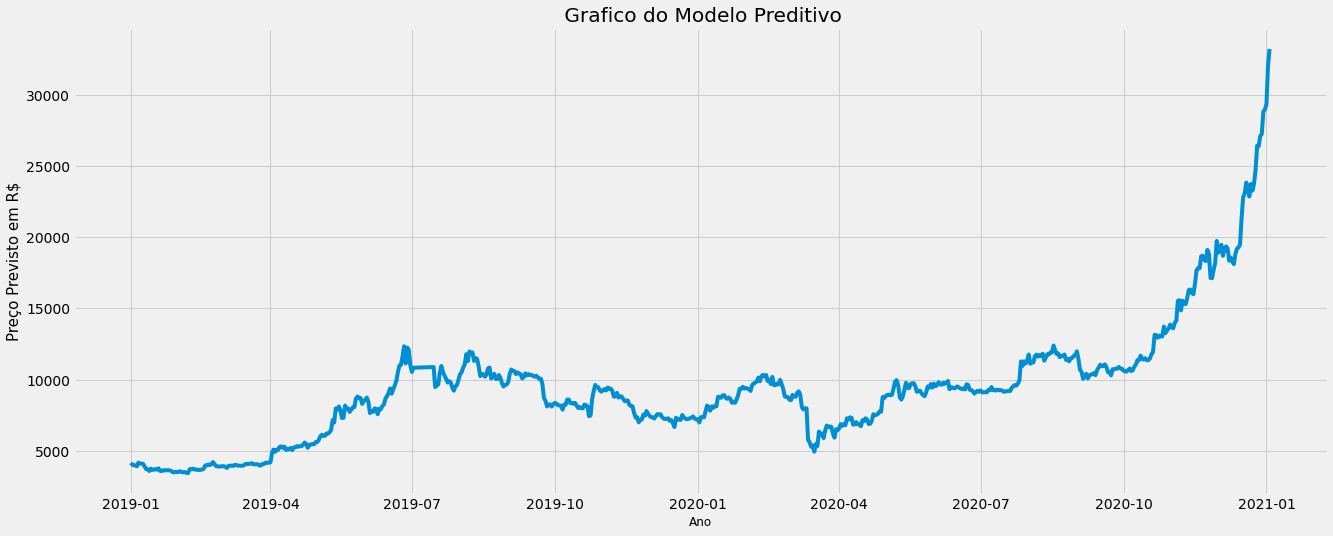

In [85]:
train = data[:trainingDataLen]
valid = data[trainingDataLen:]
valid['Validvals'] = validvals
pred = pd.DataFrame()
pred['Validvals'] = predvals[:,0]
pred['Date'] = pd.Series([(datetime.datetime.today()+datetime.timedelta(days=(i+1))).strftime('%Y-%m-%d') for i in range(FUTURE_SPAN)], index=pred.index)
pred.set_index('Date', inplace=True)
validprev = valid.append(pred)
plt.figure(figsize=(20,8))
plt.title(' Grafico do Modelo Preditivo')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Preço Previsto em R$', fontsize=15)
plt.plot(train['Last'])
plt.plot(validprev[['Last','Validvals']])
plt.legend(['Conjunto de teste','Conjunto de validação','Valor Calculado'], loc='upper left')
plt.show()